## Neeraj Bhatade

# The Sparks Foundation - GRIP August 2021

### Task 1: Prediction Using Supervised ML

#### Problem Statement: Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

### Exploring the dataset

***Import the required libraries.***

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Load the dataset***

In [5]:
scores = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
scores.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


***Exploring the features of the dataset***

In [6]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
scores.shape

(25, 2)

***Checking for null values***

In [10]:
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

*The sum of is 0 for both column thus, the dataset contains no null values and is fit for visualization.*

### Visual Representation

*Let's understand the data more with the use of different visuals*

***Scatter Plot***

Text(0, 0.5, 'Percentage Score')

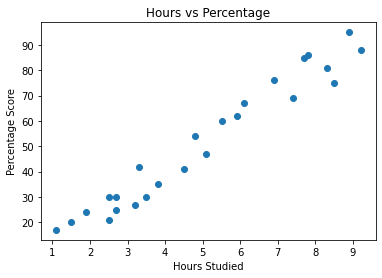

In [17]:
plt.scatter(scores['Hours'], scores['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

*Through the above plot, we can see a positive linear relation between hours studied and percentage score*

***Regression Plot***

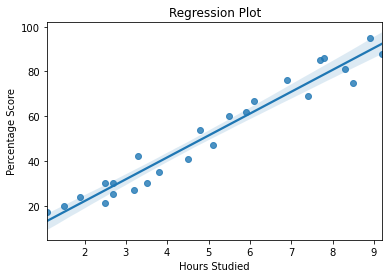

In [21]:
sns.regplot(x = scores['Hours'], y = scores['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Preparing the data

In [22]:
X = scores.iloc[:, :-1].values  
y = scores.iloc[:, 1].values 

*Now we need to split the dataset into training and test data.*

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

### Training the Model

*We will use the Simple Linear Regression Model from Linear Models to make the predictions.*

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

*Now the model is trained with the train data and can be used to make prediction.*

### Making Prediction

*Now we will use the above model to predict the values.*

In [29]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame({'Actual_Marks' : y_test, 'Prediction' : y_pred})
prediction

,Actual_Marks,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Checking the Accuracy of Model

In [39]:
from sklearn import metrics
import math

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, y_pred),3))
print("Root Mean Squared Error: ", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print("R-Square Score: ", round(metrics.r2_score(y_test, y_pred),3))


Mean Absolute Error:  4.184
Root Mean Squared Error:  4.647
R-Square Score:  0.945


*The difference between RMSE and MAE is considerably low and the r2_score value is high. Thus, this model is good for making prediction.*

### Prediction for User Input

***What will be predicted score if a student studies for 9.25 hrs/ day***

In [42]:
hours = 9.25
user_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(user_pred[0],3)))

No of Hours = 9.25
Predicted Score = 93.692


***Thus, if a student studies for 9.25 hrs/day, he might score a 93.692 perecentage***